In [2]:
import astropy.io.fits as pf
import matplotlib.pyplot as plt
import numpy as np
import sklearn.linear_model as sl
import sklearn.svm as ss
import matplotlib.cm as cm
from sklearn import metrics
import my_plot_style as mps
mps.my_plot_style()

# test https://www.dropbox.com/s/bqu2mchespz8fx8/SDSS_QSO_star_testing.fits?dl=0
# training https://www.dropbox.com/s/js9q7te2nb5sd46/SDSS_QSO_star_training.fits?dl=0

In [3]:
training = pf.open('SDSS_QSO_star_training.fits')
test = pf.open('SDSS_QSO_star_testing.fits')
# Data example taken from astroML https://www.astroml.org/book_figures/chapter9/fig_star_quasar_ROC.html

(-0.5, 1.5)

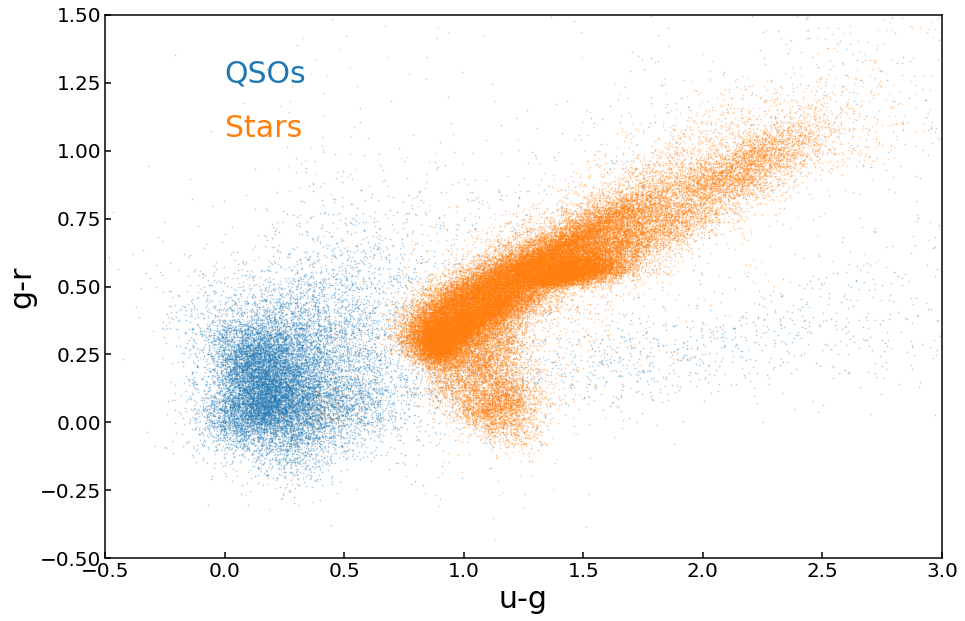

In [4]:
plt.figure(figsize=(15,10))
search = np.where(training[1].data==1)
plt.scatter(training[0].data[search[0],0],training[0].data[search[0],1],c='C0',label='QSO',s=0.5,alpha=0.3)
search = np.where(training[1].data==0)
plt.scatter(training[0].data[search[0],0],training[0].data[search[0],1],c='C1',label='Star',s=0.5,alpha=0.3)
plt.xlabel('u-g',fontsize=30)
plt.ylabel('g-r',fontsize=30)
plt.text(0.,1.25,'QSOs',fontsize=30,color='C0')
plt.text(0.,1.05,'Stars',fontsize=30,color='C1')
plt.xlim(-0.5,3)
plt.ylim(-0.5,1.5)

In [5]:
#len(training[1].data)
#len(test[1].data)

In [6]:
lg = sl.LogisticRegression() # initial a logistic regression object

In [22]:
lg.fit(training[0].data[:,0:1],training[1].data)

LogisticRegression()

In [23]:
### alpha and beta

In [24]:
alpha = lg.coef_
beta = lg.intercept_

In [25]:
print('alpha',alpha)
print('beta',beta)

alpha [[-3.68972525]]
beta [2.1281826]


In [26]:
y_pred = lg.predict(training[0].data[:,:1])
y_prob = lg.predict_proba(training[0].data[:,:1]) # output the predicted probability

(-0.5, 1.5)

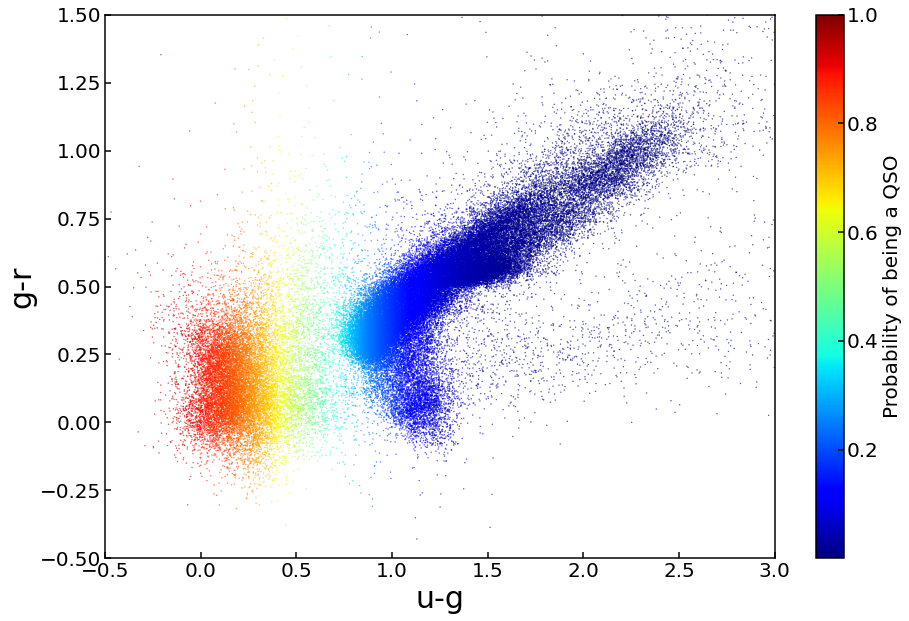

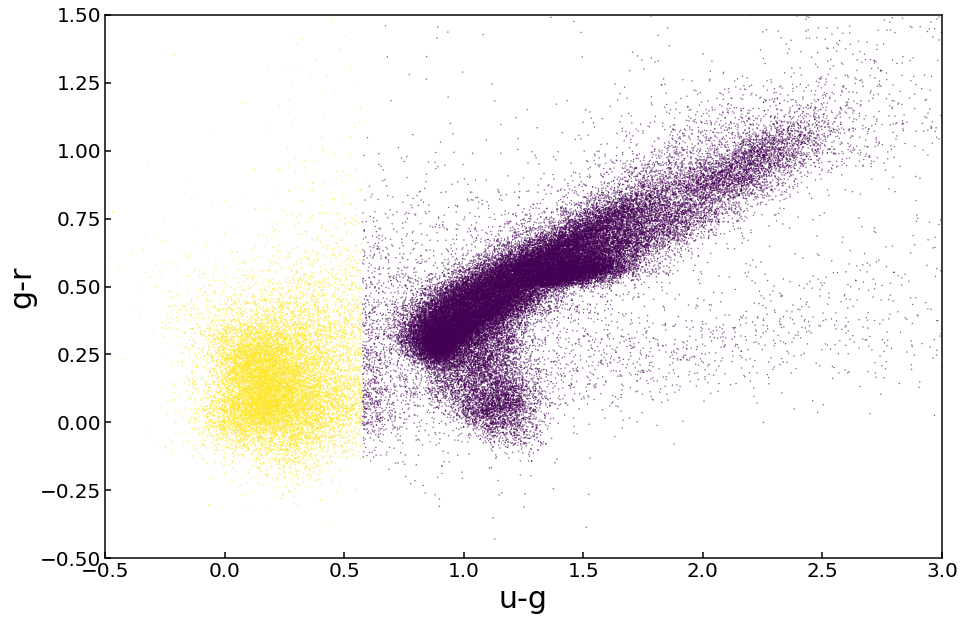

In [27]:
plt.figure(figsize=(15,10))
plt.scatter(training[0].data[:,0],training[0].data[:,1],c=y_prob[:,1],s=0.1,cmap=cm.jet)
plt.colorbar(label='Probability of being a QSO')
#y_prob = lg.predict_proba(training[0].data)
plt.xlabel('u-g',fontsize=30)
plt.ylabel('g-r',fontsize=30)
plt.xlim(-0.5,3)
plt.ylim(-0.5,1.5)
plt.figure(figsize=(15,10))
plt.scatter(training[0].data[:,0],training[0].data[:,1],c=y_pred,s=0.1)#,cmap=cm.jet)
#plt.colorbar(label='Prediction')
#y_prob = lg.predict_proba(training[0].data)
plt.xlabel('u-g',fontsize=30)
plt.ylabel('g-r',fontsize=30)
plt.xlim(-0.5,3)
plt.ylim(-0.5,1.5)

In [28]:
def completeness_purity(true_value, prediction):
    
    ### Write me
    
    return completeness, purity

In [29]:
# Write a for loop to record the completeness and purity as a function of the probability threshold

threshold = np.arange(0,1,0.01)


In [30]:
# Compare the metrics from the training set and the test set